# **Chapter 4. 머신러닝(Machine Learning) 기초** 

---
### **학습 목표**
> 4-5. 분류 성능 평가하기 <br>
> 4-6. 회귀 분석 모델링 <br>
> 4-7. 회귀 성능 평가하기 <br>

## **4-5. 분류 성능 평가하기**
> - scikit-laern은 **정확도(Accuracy)** 외에도 분류 성능을 평가하기 윈한 다양한 방법들을 제공한다.

In [1]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 실습 데이터 세트 로드(펭귄 데이터)
penguins = sns.load_dataset('penguins')

# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
# 데이터 전처리, 모델 학습, 예측
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()     # 스케일러 정의

features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]    # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화

# 정규화된 데이터도 바꿔주기
penguins = penguins.assign(bill_length_mm = features_normed[:,0],
                           bill_depth_mm = features_normed[:,1],
                           flipper_length_mm = features_normed[:,2],
                           body_mass_g = features_normed[:,3])

encoder = LabelEncoder()    # 인코더 정의

features = penguins[['species', 'island', 'sex']]   # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)     # 인코딩 실행

# 수치형 데이터로 바꿔주기
penguins = penguins.assign(species = encoded['species'],
                           island = encoded['island'],
                           sex = encoded['sex'])

X = penguins.drop('sex', axis=1)    # 예측에 사용할 변수
Y = penguins['sex']                 # 예측할 변수

# 학습 / 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

lr_model = LogisticRegression(verbose=0)
lr_model.fit(X_train, Y_train)      # 모델 학습

# 수컷(Male): 1, 암컷(Female): 0
predictions = lr_model.predict(X_test)

# 성능 평가
acc = accuracy_score(Y_test, predictions)
print(f'Logistic Regression 모델의 예측 정확도는 {round(acc*100)}% 입니다.')

Logistic Regression 모델의 예측 정확도는 90% 입니다.


> 하지만 정확도 하나만으로 "이 머신러닝 모델은 성능이 좋은 모델이다"라고 말할 수 없다.<br>
아래 그림과 같이 90%의 펭귄이 수컷인 상황이라면, '모든 펭귄을 수컷이라고 예측하는 모델'의 정확도는 90%가 된다.<br>
따라서 항상 모델의 정확도만으로 분류 성능을 평가하는 것은 주의가 필요하다.

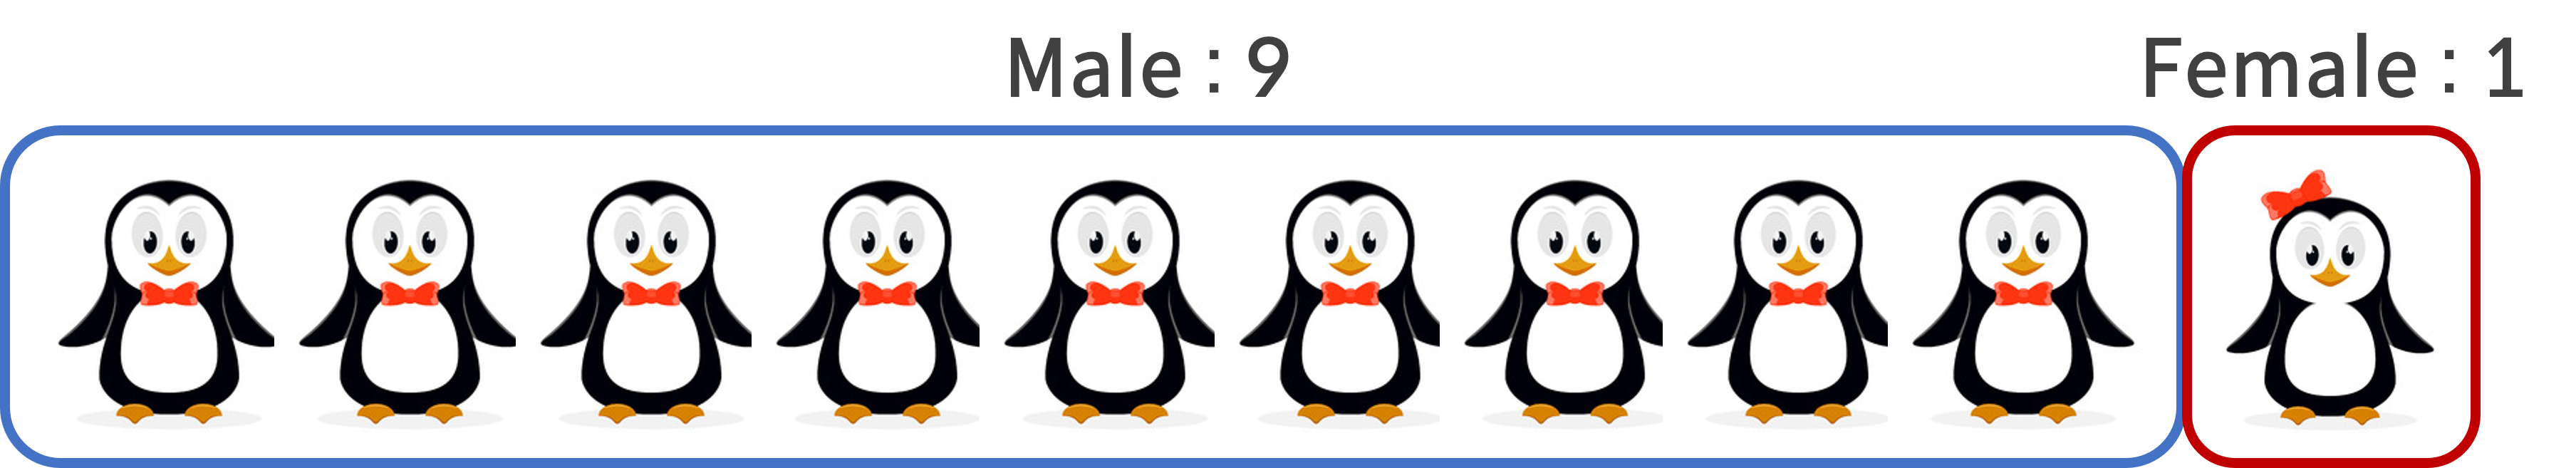

### **4-5-1. 오차 행렬(Confusion Matrix)**
> - 오차 행렬을 이용하면 분류를 하면서 모델이 얼마나 헷갈리고 있는지를 한눈에 파악할 수 있다.
- 실제 값 종류 별로 얼마나 맞추었는지, 아니면 얼마나 틀렸는지를 알 수 있어, **예측 오류의 종류 별로 분석이 가능**하다.

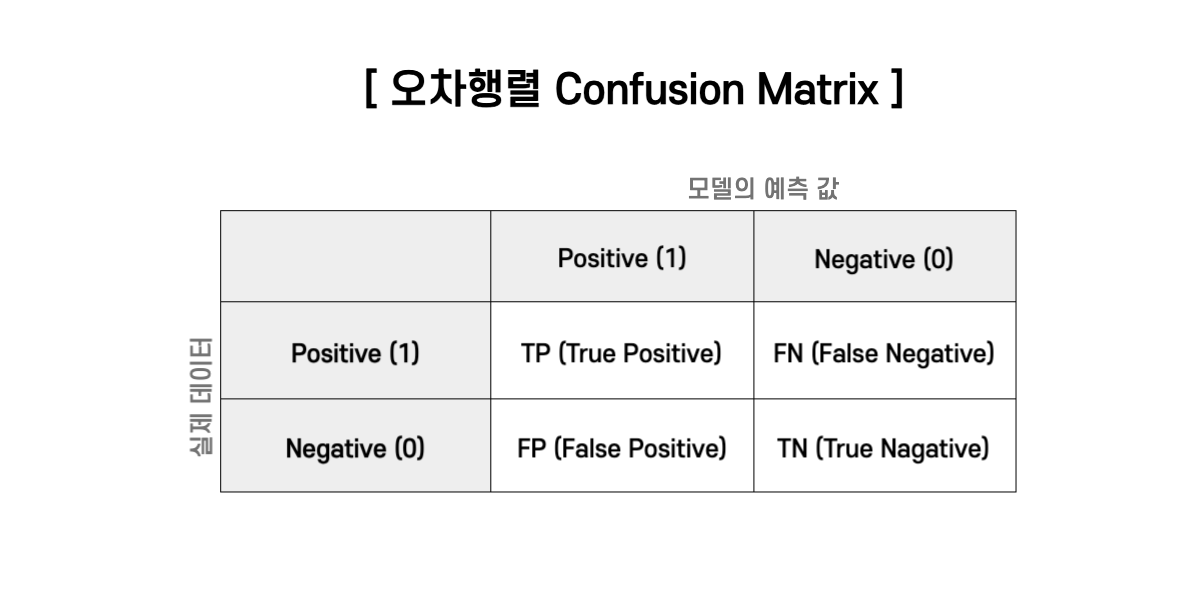

In [5]:
# 라이브러리 로딩
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix  # confusion_matrix를 시각화하는 라이브러리리

In [6]:
# 수컷(Male): 1, 암컷(Female): 0
predictions = lr_model.predict(X_test)

In [7]:
# confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)

In [8]:
cnf_matrix

array([[33,  1],
       [ 6, 27]])

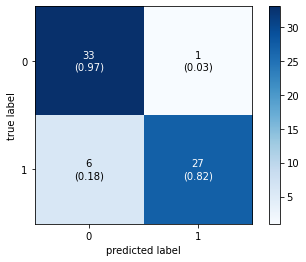

In [9]:
# Confusion Matrix 시각화 하기
figure, ax = plot_confusion_matrix(conf_mat = cnf_matrix,   # confusion matrix
                                   show_absolute = True,    # 절대값 보여주기
                                   show_normed = True,       # 비율 보여주기기
                                   colorbar = True)
plt.show()

### **4-5-2. 정확도(Accuracy) / 정밀도(Precision)**
> - 정확도와 정밀도는 함께 봐야하는 중요한 지표 중 하나이다.
- scikit-learn에서는 0~1 사이 값으로 계산해준다.
- **정확도(Accuracy)** : 전체 분류 결과 중에서 실제 참으로 예측한 비율
    - 전체 데이터에서 얼마나 올바르게 맞췄나?
    - TP + TN / TP + FP + TN + FN
- **정밀도(Precision)** : 참으로 예측한 결과 중 실제 참으로 맞춘 비율
    - 얼마나 정밀하게 참으로 예측했는가?
    - TP / TP + FP

In [10]:
# 라이브러리 로딩
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [11]:
# 정확도
accuracy_score(Y_test, predictions)

0.8955223880597015

In [12]:
# 정밀도
precision_score(Y_test, predictions)

0.9642857142857143

### **4-5-3. 재현율(Recall)**
- 재현율(Recall)은 Hit Ratio 등으로 불리는 지표이다.
- 정밀도와 유사하지만, 다른 점은 분모에 "실제 참 값"이 들어간다.
- scikit-learn에선 0~1 사이 값으로 계산해준다.
- 재현율(Recall) : "실제 참값 중"에서 "참으로 예측한 비율"
    - 참값을 얼마나 잘 재현해 내었는가?
    - TP / TP + FN

In [13]:
# 라이브러리 로딩
from sklearn.metrics import recall_score

In [14]:
# 재현율
recall_score(Y_test, predictions)

0.8181818181818182

### **4-5-4. F1 점수(F1-score)**
> - F1-score는 재현율(recall)과 정밀도(precision)가 한쪽으로 치우치지 않았는지 나타내는 지표입니다.
- 재현율과 정밀도는 한쪽이 높아지만 다른쪽이 낮아지는 Trade-off 관계이다.
- 주로 데이터가 심각한 불균형 상태일 때 평가를 제대로 하기 위해 사용합니다.
- F1 점수 : 데이터 불균형을 보정한 분류 성능
    - 데이터가 불균형한 상태에서도 얼마나 잘 예측하였나?
    - 2 x Precision x Recall / Precision + Recall

In [15]:
# 라이브러리 로딩
from sklearn.metrics import f1_score

In [16]:
# f1 점수
f1_score(Y_test, predictions)

0.8852459016393442

### **4-5-5. ROC(Receiver Operator Characteristic) 커브**
> - ROC 커브는 분류 모델의 판단 기준을 연속적으로 바꾸면서 성능에 어떤 변화가 있는지 측정하는 방법이다.
- **TPR(True Positive Rate, = Recall)** : 참 값에 대해 참으로 바로 예측하는 비율
    - TP / TP + FN
- **FPR(False Positive Rate)** : 거짓 값에 대해 참으로 틀리게 예측하는 비율
    - FP / FP + TN
- 커브 아래 면적을 **AUC(Area under the ROC curve)**라고 한다.
- 이 AUC 면적이 클수록 분류 성능이 좋은 모델이라 평가한다.


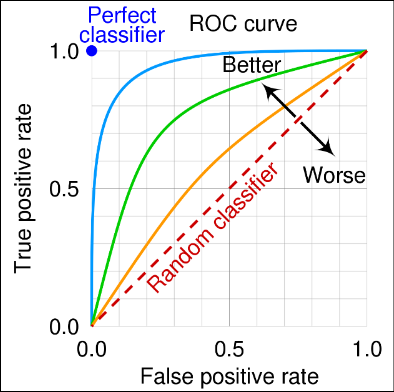

In [17]:
# 라이브러리 로딩
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

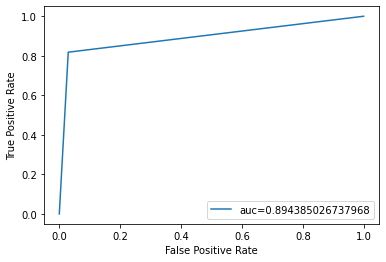

In [18]:
# ROC 커브 시각화
fpr, tpr, _ = roc_curve(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

> **전체 분류 모델 성능 지표**

In [19]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)
auc_score = roc_auc_score(Y_test, predictions)

print(f"accuracy: {round(accuracy, 2)}")
print(f"precision: {round(precision, 2)}")
print(f"recall: {round(recall, 2)}")
print(f"f1_score: {round(f1_score, 2)}")
print(f"auc_score: {round(auc_score, 2)}")

accuracy: 0.9
precision: 0.96
recall: 0.82
f1_score: 0.89
auc_score: 0.89
